<a href="https://colab.research.google.com/github/caleb-stewart/A-Z_Machine-Learning/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

#### We are using SVR. Before we used Polynomial Regression and already got good results. Lets see the results using SVR

Keep in mind this is a non-linear SVR. I will learn the context and the intuition later in the course

## Importing the libraries

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [72]:
# X = Level
# y = salary
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print(X)
y = y.reshape(len(y), 1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [73]:
# We need to apply feature scaling. This is because there is an implicit relationship between X and y
# Feature scale the dependent variable, because we dont want it to be neglected by the SVR model

# Dont feature scale dummy variables or one hot encoding
# Feature scale dependent variables high values in respect of other features
#   Dont forget to inverse the feature scaling when predicting a result

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # Should be between -3, 3
# Feature scale X
X = sc_X.fit_transform(X)
# feature scale dependent y
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print('X: ')
print(X)
print('y: ')
print(y)

X: 
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y: 
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [88]:
# Train the whole data set because we did not split
# Build the SVR model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # Non-linear
# rbf = Radial Basis Function

# Train regressor on X to determine y
reg = regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting a new result

In [86]:
# We will need to reverse the scaling of prediction
# regressor.predict([[6.5]])

# We need to scale the prediction (6.5)
scaled_pred = regressor.predict(sc_X.transform([[6.5]]))
print(scaled_pred)
# Our result is still scalled, so we need to reverse this

# This is our real prediction
pred = sc_y.inverse_transform(scaled_pred.reshape(-1, 1))
print(pred)


[-0.27861589]
[[170370.0204065]]


## Visualising the SVR results

Text(0.5, 1.0, 'SVR')

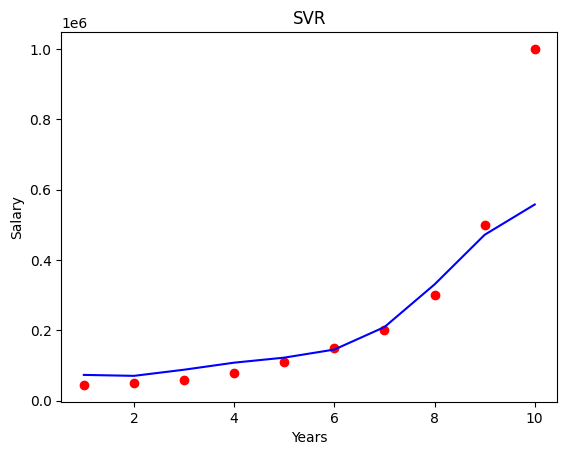

In [94]:
# Plot the original values in red
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
# Make the regression, of the original X, and the prediction of y, but make sure its inverse transform
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('SVR')

# This can be shown that the predictions are pretty close